# 1 Import Libraries and Read Data

In [37]:
# please make sure the environment already have packages for the libraries below
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.dates as mdates
from matplotlib import gridspec
from matplotlib.dates import DateFormatter
from matplotlib import rc
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statistics
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import datetime
import collections

In [38]:
# read data
long_term = pd.read_csv('financials__long_term.csv')
short_term = pd.read_csv('financials__short_term.csv')

# set timespan
short_term.loc[:, "date"] = pd.to_datetime(
    short_term["date"]
)
long_term.loc[:, "date"] = pd.to_datetime(
    long_term["date"]
)

# get company list
company_list_long = np.unique(long_term.loc[:,'company_name'])
company_list_short = np.unique(short_term.loc[:,'company_name'])

# 2 Data Cleaning

## 2.1 Short term overall by country

In [39]:
'''The short_term data is problematic in the sense that 
the number of company data points on each date are not the same.
Thus we need to guarantee that on each date we have enough data points.
If not, some points on the line chart will stand out which is not applaudible.
And also, each date we should have one data point for all the groups.'''
# set new variable percent_change as the price percentage change from the first time point of each company
for i in company_list_short:
    company_i = np.where(short_term['company_name']==i)[0]
    short_term.loc[company_i,'percent_change']=(short_term.loc[company_i,'price']/short_term.loc[company_i[0],'price']-1)*100

# separate data into countries
arrays_uk = short_term.loc[short_term['country']=='united kingdom'].reset_index()
arrays_ge = short_term.loc[short_term['country']=='germany'].reset_index()
arrays_fr = short_term.loc[short_term['country']=='france'].reset_index()

# make sure every date we have more than 20 data points for each country
for country in (arrays_uk,arrays_ge,arrays_fr):
    date_fre = collections.Counter(country['date'])
    del_time = [i for i, d in zip(date_fre.keys(),date_fre.values()) if d<20]
    del_time_b = []

# drop the time when there are few than 20 data points for each country
    for i in del_time:
        del_time_b.extend(np.where(country['date']==i)[0])
    country.drop(del_time_b,inplace = True)

# recreate the data frame
short_term_re = pd.concat([arrays_uk,arrays_ge,arrays_fr])

# get the average percentage change for each country
'''
We see the companies in each country as a portfolio and assign equal weights to them.
The first time point is zero and we want to see how the average stock price evolve
'''
short_term_pc = short_term_re.groupby(['country','date'])['percent_change'].agg(np.mean)
short_term_pc = short_term_pc.to_frame()
short_term_pc.reset_index(inplace = True)

# make sure every date we have a data point for each country
date_fre = collections.Counter(short_term_pc['date'])
del_time = [i for i, d in zip(date_fre.keys(),date_fre.values()) if d!=3]
del_time_b = []

# drop the time when not all the countries have data
for i in del_time:
    del_time_b.extend(np.where(short_term_pc['date']==i)[0])
short_term_pc.drop(del_time_b,inplace = True)

# Create a new data frame for draing graph and separate countries
arrays_graph_uk = np.array(short_term_pc.loc[short_term_pc['country']=='united kingdom'].groupby('date')['percent_change'].agg(np.mean))
arrays_graph_ge = np.array(short_term_pc.loc[short_term_pc['country']=='germany'].groupby('date')['percent_change'].agg(np.mean))
arrays_graph_fr = np.array(short_term_pc.loc[short_term_pc['country']=='france'].groupby('date')['percent_change'].agg(np.mean))
cool_df_dict = {'GE' : arrays_graph_ge, 'FR' : arrays_graph_fr, 'UK' : arrays_graph_uk}
cool_df = pd.DataFrame(data=cool_df_dict)

cool_df

,GE,FR,UK
0,0.000000,0.000000,0.000000
1,0.010227,0.427242,0.620149
2,-1.575766,-1.032072,-0.871679
3,-3.988460,-3.199306,-3.752954
4,-5.115497,-3.958658,-5.127587
...,...,...,...
246,10.458164,9.239794,-3.969424
247,10.587583,9.413209,-4.281587
248,10.999028,9.757596,-3.373802
249,10.700091,9.610090,-4.234617


## 2.2 Long term overall by country

In [40]:
# set new variable percent_change as the price percentage change from the first time point of each company
for i in company_list_long:
    company_i = np.where(long_term['company_name']==i)[0]
    long_term.loc[company_i,'percent_change']=(long_term.loc[company_i,'price']/long_term.loc[company_i[0],'price']-1)*100
long_term_pc = long_term.groupby(['country','date'])['percent_change'].agg(np.mean)
long_term_pc = long_term_pc.to_frame()
long_term_pc.reset_index(inplace = True)

# Create a new data frame for draing graph and separate countries
arrays_graph_uk_long = np.array(long_term_pc.loc[long_term_pc['country']=='united kingdom'].groupby('date')['percent_change'].agg(np.mean))
arrays_graph_ge_long = np.array(long_term_pc.loc[long_term_pc['country']=='germany'].groupby('date')['percent_change'].agg(np.mean))
arrays_graph_fr_long = np.array(long_term_pc.loc[long_term_pc['country']=='france'].groupby('date')['percent_change'].agg(np.mean))


cool_df_dict_long = { 'GE' : arrays_graph_ge_long, 'FR' : arrays_graph_fr_long, 'UK' : arrays_graph_uk_long}


cool_df_long = pd.DataFrame(data=cool_df_dict_long)

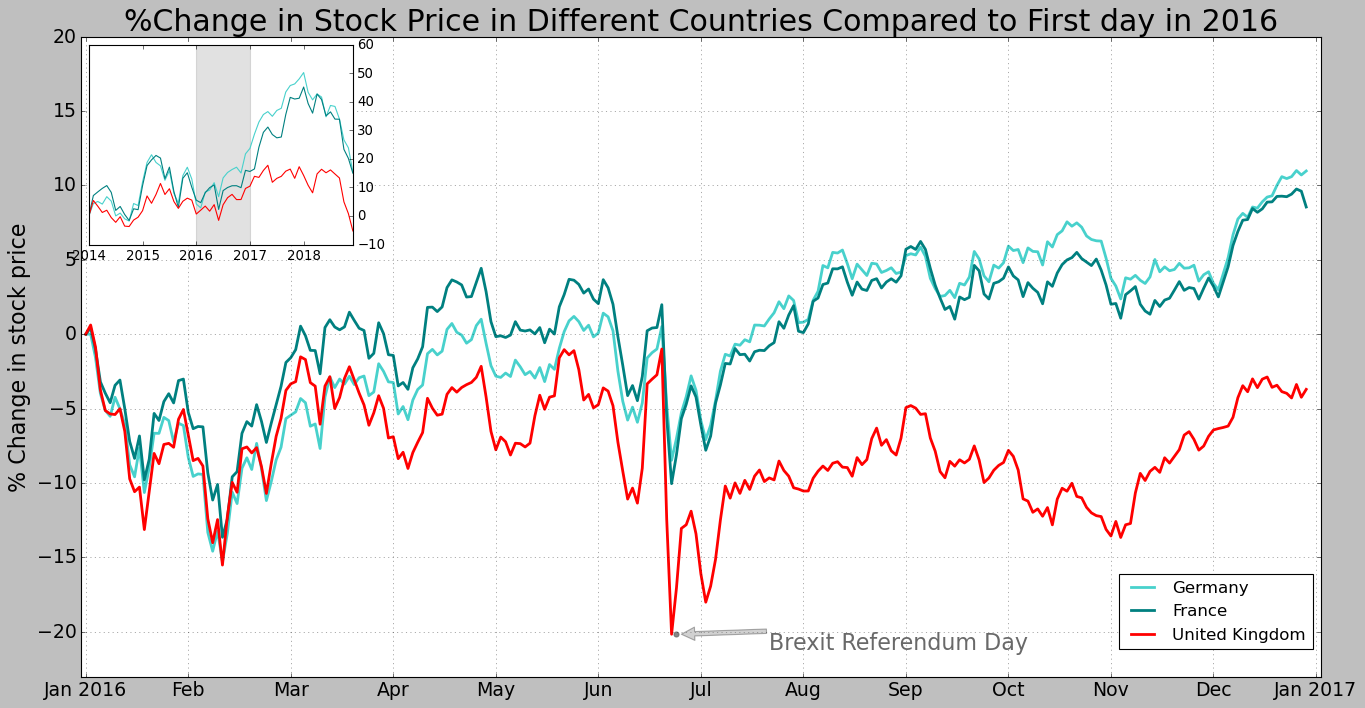

In [54]:
plt.style.use("classic")
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

ax.plot(cool_df['GE'], color='mediumturquoise', linewidth=2.5)
ax.plot(cool_df['FR'], color='teal', linewidth=2.5)
ax.plot(cool_df['UK'], color='r', linewidth=2.5)


#ax.legend()
#plt.colormap('jet')
plt.ylim(-23,20)
plt.xlim(-1,253)
plt.grid(True, linewidth=0.6, alpha=0.5)
plt.locator_params(axis='x', nbins=13)
plt.xticks(np.arange(0, 253, step=21), ('Jan 2016', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2017'), fontsize=17)
plt.yticks(fontsize=17)
#ax.legend(('Germany','France','United Kingdom'), loc=1)
ax.legend(('Germany','France','United Kingdom'), loc=4, bbox_to_anchor=(0.5, 0.03, 0.5, 0.5), fontsize=15)
plt.ylabel('% Change in stock price', size=20)
#plt.xlabel('Time', size=15)
plt.title('%Change in Stock Price in Different Countries Compared to First day in 2016', size=27)

ax.annotate("Brexit Referendum Day", color='dimgrey',
            xy=(122,-20.157),
            xytext=(140, -21.157),
            arrowprops=dict(facecolor='dimgrey', alpha=0.3), size=20
           )
ax.scatter(121, -20.157, marker='o', color='dimgrey', alpha=0.8)




axins = inset_axes(ax, width=3.3, height=2.5, loc=2)
# axins.plot(cool_df_long)
axins.plot(cool_df_long['GE'], color='mediumturquoise')
axins.plot(cool_df_long['FR'], color='teal')
axins.plot(cool_df_long['UK'], color='r')

#axins.yaxis.set_visible(False)
axins.yaxis.tick_right()
plt.locator_params(axis='x', nbins=5)
plt.xticks(np.arange(0, 61, step=12), ('2014', '2015','2016','2017','2018', '2019'))
axins.axvspan(24,36,
              color='dimgrey', alpha=0.2)

plt.savefig('%Change in Stock Price in Different Countries Compared to First day in 2016')
plt.savefig('%Change in Stock Price in Different Countries Compared to First day in 2016.pdf')

# 3 Percentage Change in Stock Price Across All Countries By Sector'

## 3.1 Filter data

In [42]:
# separate data into sectors
arrays_consumer_discretionary_short = short_term.loc[short_term['sector']=='consumer discretionary'].reset_index()
arrays_consumer_staples_short = short_term.loc[short_term['sector']=='consumer staples'].reset_index()
arrays_e_m_short = short_term.loc[short_term['sector']=='energy and materials'].reset_index()
arrays_financials_short = short_term.loc[short_term['sector']=='financials'].reset_index()
arrays_industrials_short = short_term.loc[short_term['sector']=='industrials'].reset_index()
arrays_utilities_short = short_term.loc[short_term['sector']=='utilities'].reset_index()

# make sure every date we have enough data points for each sector
for sector in (arrays_consumer_discretionary_short,arrays_consumer_staples_short,arrays_e_m_short,
              arrays_financials_short,arrays_industrials_short,arrays_utilities_short):
    date_fre = collections.Counter(sector['date'])
    del_time = [i for i, d in zip(date_fre.keys(),date_fre.values()) if d<np.mean(list(date_fre.values()))/2]
    del_time_b = []

# drop the time when there are few than enough data points for each sector
    for i in del_time:
        del_time_b.extend(np.where(sector['date']==i)[0])
    sector.drop(del_time_b,inplace = True)

# recreate the data frame
short_term_re_1 = pd.concat([arrays_consumer_discretionary_short,arrays_consumer_staples_short,arrays_e_m_short,
              arrays_financials_short,arrays_industrials_short,arrays_utilities_short])

# get the average percentage change for each sector
short_term_ps = short_term_re_1.groupby(['sector','date'])['percent_change'].agg(np.mean)
short_term_ps = short_term_ps.to_frame()
short_term_ps.reset_index(inplace = True)

# make sure every date we have a data point for each sector
date_fre = collections.Counter(short_term_ps['date'])
del_time = [i for i, d in zip(date_fre.keys(),date_fre.values()) if d!=6]
del_time_b = []

# drop the time when not all the sectors have data
for i in del_time:
    del_time_b.extend(np.where(short_term_ps['date']==i)[0])
short_term_ps.drop(del_time_b,inplace = True)

# Create a new data frame for draing graph and separate sectors
arrays_graph_consumer_discretionary_short = np.array(short_term_ps.loc[short_term_ps['sector']=='consumer discretionary'].groupby('date')['percent_change'].agg(np.mean))
arrays_graph_consumer_staples_short = np.array(short_term_ps.loc[short_term_ps['sector']=='consumer staples'].groupby('date')['percent_change'].agg(np.mean))
arrays_graph_e_m_short = np.array(short_term_ps.loc[short_term_ps['sector']=='energy and materials'].groupby('date')['percent_change'].agg(np.mean))
arrays_graph_financials_short = np.array(short_term_ps.loc[short_term_ps['sector']=='financials'].groupby('date')['percent_change'].agg(np.mean))
arrays_graph_industrials_short = np.array(short_term_ps.loc[short_term_ps['sector']=='industrials'].groupby('date')['percent_change'].agg(np.mean))
arrays_graph_utilities_short = np.array(short_term_ps.loc[short_term_ps['sector']=='utilities'].groupby('date')['percent_change'].agg(np.mean))

cool_df_short_sector_dict = { 'consumer discretionary' : arrays_graph_consumer_discretionary_short, 'consumer staples' : arrays_graph_consumer_staples_short , 'energy and materials' : arrays_graph_e_m_short, 'financials' : arrays_graph_financials_short , 'industrials' : arrays_graph_industrials_short, 'utilities' :  arrays_graph_utilities_short}
cool_df_short_sector= pd.DataFrame(data=cool_df_short_sector_dict)

## 3.2 Draw the graph

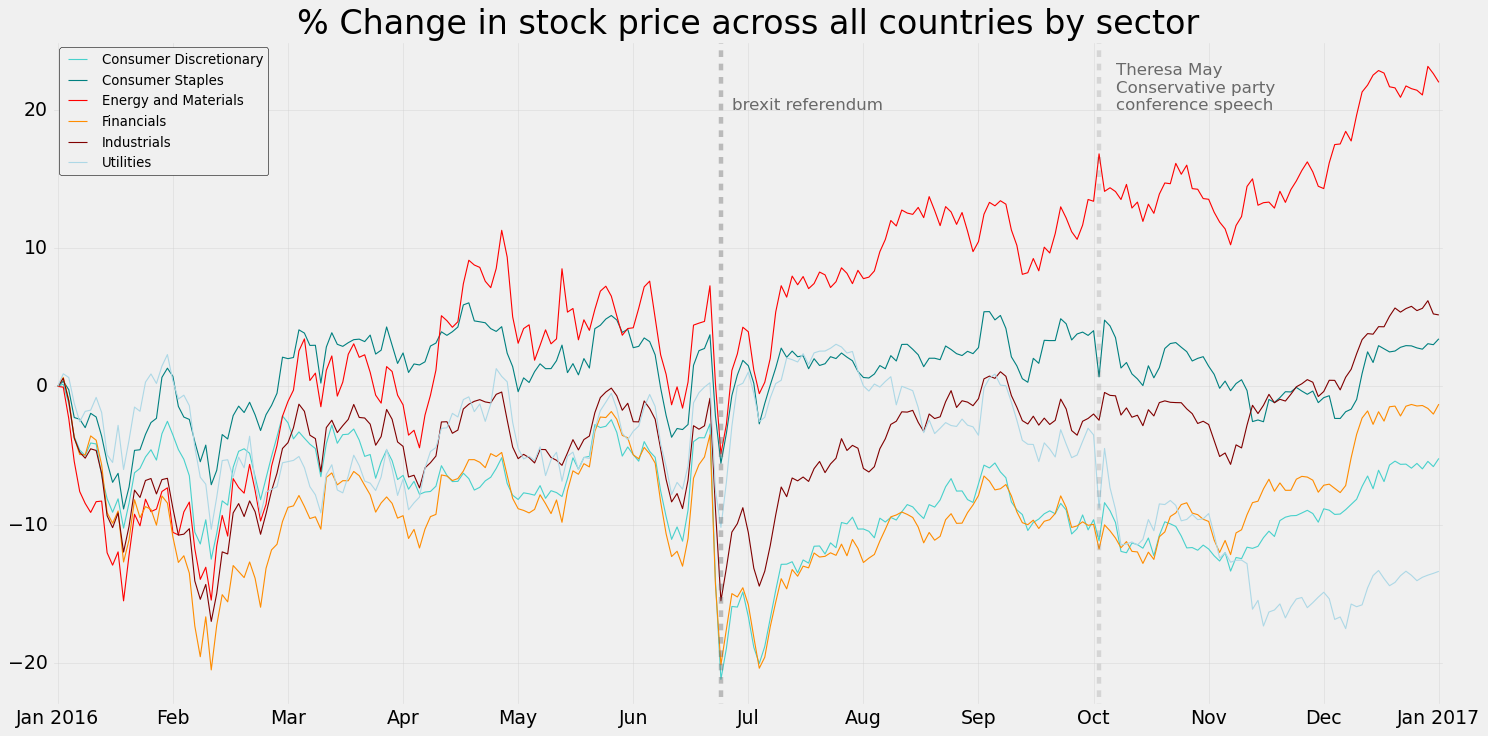

In [43]:
# Style and figure
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,10))

# plot overall change in price by different sectors
plt.plot(cool_df_short_sector['consumer discretionary'], color='mediumturquoise', linewidth=1)
plt.plot(cool_df_short_sector['consumer staples'], color='teal', linewidth=1)
plt.plot(cool_df_short_sector['energy and materials'], color='r', linewidth=1)
plt.plot(cool_df_short_sector['financials'], color='darkorange', linewidth=1)
plt.plot(cool_df_short_sector['industrials'], color='maroon', linewidth=1)
plt.plot(cool_df_short_sector['utilities'], color='lightblue', linewidth=1)

# set the axis and legend
plt.ylim(-23,25)
plt.xlim(-1,253)
plt.grid(True, linewidth=0.6, alpha=0.5)
plt.locator_params(axis='x', nbins=13)
plt.xticks(np.arange(0, 253, step=21), ('Jan 2016', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2017'), fontsize=17)
plt.yticks(fontsize=17)
plt.legend(('Consumer Discretionary','Consumer Staples','Energy and Materials','Financials','Industrials','Utilities'), loc=2, fontsize=12).get_frame().set_edgecolor('black')

# Title and Annotation
plt.title('% Change in stock price across all countries by sector', fontsize=30)
plt.plot([121,121],[-45,45], "k--", color="dimgrey", alpha=0.4)
plt.annotate('brexit referendum' ,(123,20), fontsize=15, color="dimgrey")
plt.plot([190,190],[-45,45], "k--", color="dimgrey", alpha=0.2)
plt.annotate('Theresa May \nConservative party \nconference speech' ,(193,20), fontsize=15, color="dimgrey")

# save image
plt.savefig('% Change in stock price across all countries by sector')
plt.savefig('% Change in stock price across all countries by sector.pdf')

# 4 Difference in UK average percentage change in stock price against Germany-France by sector for 2016



## 4.1 Filter data

In [44]:
'''
The procedure of filtering is the same as before.
'''
# we are going to fill the list with different countries' data
arrays_graph_consumer_discretionary_short_c=[]
arrays_graph_consumer_staples_short_c=[]
arrays_graph_e_m_short_c=[]
arrays_graph_financials_short_c=[]
arrays_graph_industrials_short_c=[]
arrays_graph_utilities_short_c=[]

# for loop for countries
for i, country in enumerate(['germany','united kingdom', 'france']):
    # separate data into sectors
    arrays_consumer_discretionary_short_c = short_term.loc[(short_term['sector']=='consumer discretionary')&(short_term['country']==country)].reset_index()
    arrays_consumer_staples_short_c = short_term.loc[(short_term['sector']=='consumer staples')&(short_term['country']==country)].reset_index()
    arrays_e_m_short_c = short_term.loc[(short_term['sector']=='energy and materials')&(short_term['country']==country)].reset_index()
    arrays_financials_short_c = short_term.loc[(short_term['sector']=='financials')&(short_term['country']==country)].reset_index()
    arrays_industrials_short_c = short_term.loc[(short_term['sector']=='industrials')&(short_term['country']==country)].reset_index()
    arrays_utilities_short_c = short_term.loc[(short_term['sector']=='utilities')&(short_term['country']==country)].reset_index()

    # make sure every date we have enough data points for each sector
    for sector_c in (arrays_consumer_discretionary_short_c,arrays_consumer_staples_short_c,arrays_e_m_short_c,
                  arrays_financials_short_c,arrays_industrials_short_c,arrays_utilities_short_c):
        date_fre = collections.Counter(sector_c['date'])
        del_time = [i for i, d in zip(date_fre.keys(),date_fre.values()) if d<np.mean(list(date_fre.values()))/3]
        del_time_b = []

    # drop the time when there are few than enough data points for each sector
        for i in del_time:
            del_time_b.extend(np.where(sector_c['date']==i)[0])
        sector_c.drop(del_time_b,inplace = True)

    # recreate the data frame
    short_term_re_c = pd.concat([arrays_consumer_discretionary_short_c,arrays_consumer_staples_short_c,arrays_e_m_short_c,
                  arrays_financials_short_c,arrays_industrials_short_c,arrays_utilities_short_c])

    # get the average percentage change for each sector
    short_term_psc = short_term_re_c.groupby(['sector','date'])['percent_change'].agg(np.mean)
    short_term_psc = short_term_psc.to_frame()
    short_term_psc.reset_index(inplace = True)

    # make sure every date we have a data point for each sector
    date_fre = collections.Counter(short_term_psc['date'])
    del_time = [i for i, d in zip(date_fre.keys(),date_fre.values()) if d!=6]
    del_time_b = []

    # drop the time when not all the sectors have data
    for i in del_time:
        del_time_b.extend(np.where(short_term_psc['date']==i)[0])
    short_term_psc.drop(del_time_b,inplace = True)

    # fill in the new lists for draing graph and separating sectors
    arrays_graph_consumer_discretionary_short_c.append(np.array(short_term_psc.loc[short_term_psc['sector']=='consumer discretionary'].groupby('date')['percent_change'].agg(np.mean)))
    arrays_graph_consumer_staples_short_c.append(np.array(short_term_psc.loc[short_term_psc['sector']=='consumer staples'].groupby('date')['percent_change'].agg(np.mean)))
    arrays_graph_e_m_short_c.append(np.array(short_term_psc.loc[short_term_psc['sector']=='energy and materials'].groupby('date')['percent_change'].agg(np.mean)))
    arrays_graph_financials_short_c.append(np.array(short_term_psc.loc[short_term_psc['sector']=='financials'].groupby('date')['percent_change'].agg(np.mean)))
    arrays_graph_industrials_short_c.append(np.array(short_term_psc.loc[short_term_psc['sector']=='industrials'].groupby('date')['percent_change'].agg(np.mean)))
    arrays_graph_utilities_short_c.append(np.array(short_term_psc.loc[short_term_psc['sector']=='utilities'].groupby('date')['percent_change'].agg(np.mean)))

In [45]:
# get data for countries
# germany
cool_df_short_sector_dict_ge = { 'consumer discretionary ge' : arrays_graph_consumer_discretionary_short_c[0], 'consumer staples ge' : arrays_graph_consumer_staples_short_c[0] , 'energy and materials ge' : arrays_graph_e_m_short_c[0], 'financials ge' : arrays_graph_financials_short_c[0] , 'industrials ge' : arrays_graph_industrials_short_c[0], 'utilities ge' :  arrays_graph_utilities_short_c[0]}
cool_df_short_sector_ge= pd.DataFrame(data=cool_df_short_sector_dict_ge)
cool_df_short_sector_ge.head()

,consumer discretionary ge,consumer staples ge,energy and materials ge,financials ge,industrials ge,utilities ge
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.456502,-1.989368,-0.529289,0.215579,0.137908,1.231529
2,-1.103087,-2.592674,-2.601408,-0.971702,-1.662399,1.256037
3,-3.533109,-4.137789,-5.099987,-3.517399,-4.007943,-1.582245
4,-4.663522,-5.380286,-6.243947,-4.758139,-4.975100,-3.506271


In [46]:
# united kingdom
cool_df_short_sector_dict_uk = { 'consumer discretionary uk' : arrays_graph_consumer_discretionary_short_c[1], 'consumer staples uk' : arrays_graph_consumer_staples_short_c[1] , 'energy and materials uk' : arrays_graph_e_m_short_c[1], 'financials uk' : arrays_graph_financials_short_c[1] , 'industrials uk' : arrays_graph_industrials_short_c[1], 'utilities uk' :  arrays_graph_utilities_short_c[1]}
cool_df_short_sector_uk= pd.DataFrame(data=cool_df_short_sector_dict_uk)
cool_df_short_sector_uk.head()

,consumer discretionary uk,consumer staples uk,energy and materials uk,financials uk,industrials uk,utilities uk
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.176928,0.586043,0.546539,0.937495,0.895013,1.210667
2,-1.136435,-0.072828,-1.884698,-1.277449,-0.409606,1.001833
3,-3.554547,-2.576717,-5.443342,-4.438389,-3.624379,-0.860537
4,-4.736517,-2.513476,-8.169010,-5.953169,-4.842671,-1.994688


In [47]:
# france
cool_df_short_sector_dict_fr = { 'consumer discretionary fr' : arrays_graph_consumer_discretionary_short_c[2], 'consumer staples fr' : arrays_graph_consumer_staples_short_c[2] , 'energy and materials fr' : arrays_graph_e_m_short_c[2], 'financials fr' : arrays_graph_financials_short_c[2] , 'industrials fr' : arrays_graph_industrials_short_c[2], 'utilities fr' :  arrays_graph_utilities_short_c[2]}
cool_df_short_sector_fr= pd.DataFrame(data=cool_df_short_sector_dict_fr)
cool_df_short_sector_fr.head()

,consumer discretionary fr,consumer staples fr,energy and materials fr,financials fr,industrials fr,utilities fr
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.179690,0.882386,-1.293621,0.770284,0.720205,0.203130
2,-1.813989,0.319526,-3.428980,-0.467473,-1.133086,-0.364984
3,-4.049473,-1.192209,-6.445226,-2.604179,-3.549348,-1.590617
4,-4.036431,-1.178958,-9.483843,-3.293376,-4.391743,-2.858101


## 4.2 Calculation

In [48]:
cool_df_short_sector_ge.insert(0, 'New_ID', range(0, len(cool_df_short_sector_ge)))
cool_df_short_sector_fr.insert(0, 'New_ID', range(0, len(cool_df_short_sector_fr)))
cool_df_short_sector_uk.insert(0, 'New_ID', range(0, len(cool_df_short_sector_uk)))

# merge Germany and France data
all_df_short_sector=pd.DataFrame()
all_df_short = pd.merge(cool_df_short_sector_ge, cool_df_short_sector_fr, on='New_ID')

# The mean of percentage change for Germany and France in sectors
all_df_short_mean=pd.DataFrame()
all_df_short_mean['consumer discretionary ge fr']=all_df_short[['consumer discretionary ge', 'consumer discretionary fr']].mean(axis=1)
all_df_short_mean['consumer staples ge fr']=all_df_short[['consumer staples ge', 'consumer staples fr']].mean(axis=1)
all_df_short_mean['energy and materials ge fr']=all_df_short[['energy and materials ge', 'energy and materials fr']].mean(axis=1)
all_df_short_mean['financials ge fr']=all_df_short[['financials ge', 'financials fr']].mean(axis=1)
all_df_short_mean['industrials ge fr']=all_df_short[['industrials ge', 'industrials fr']].mean(axis=1)
all_df_short_mean['utilities ge fr']=all_df_short[['utilities ge', 'utilities fr']].mean(axis=1)

all_df_short_mean.insert(0, 'New_ID', range(0, len(all_df_short_mean)))

all_df_short_sector=pd.merge(cool_df_short_sector_uk, all_df_short_mean, on='New_ID')

# Compute the difference between UK and the mean of Germany and France in different sectors
diff_all_sector=pd.DataFrame()
diff_all_sector['consumer discretionary']= all_df_short_sector['consumer discretionary uk']-all_df_short_sector['consumer discretionary ge fr']
diff_all_sector['consumer staples']= all_df_short_sector['consumer staples uk']-all_df_short_sector['consumer staples ge fr']
diff_all_sector['energy and materials']= all_df_short_sector['energy and materials uk']-all_df_short_sector['energy and materials ge fr']
diff_all_sector['financials']= all_df_short_sector['financials uk']-all_df_short_sector['financials ge fr']
diff_all_sector['industrials']= all_df_short_sector['industrials uk']-all_df_short_sector['industrials ge fr']
diff_all_sector['utilities']= all_df_short_sector['utilities uk']-all_df_short_sector['utilities ge fr']

diff_all_sector.insert(0, 'New_ID', range(0, len(diff_all_sector)))

diff_all_sector

,New_ID,consumer discretionary,consumer staples,energy and materials,financials,industrials,utilities
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.038522,1.139534,1.457994,0.444563,0.465957,0.493338
2,2,0.322104,1.063746,1.130496,-0.557861,0.988137,0.556307
3,3,0.236744,0.088282,0.329264,-1.377600,0.154266,0.725893
4,4,-0.386541,0.766146,-0.305115,-1.927412,-0.159250,1.187498
...,...,...,...,...,...,...,...
248,248,-37.665932,-14.573470,5.114636,-12.972129,-13.028930,0.481023
249,249,-38.201315,-14.584909,4.456690,-13.368011,-13.381691,0.868217
250,250,-37.757888,-13.521155,7.694694,-13.468931,-12.720934,0.836106
251,251,-38.658115,-13.862907,6.612771,-14.291642,-14.366864,0.983774


## 4.3 Draw the graph

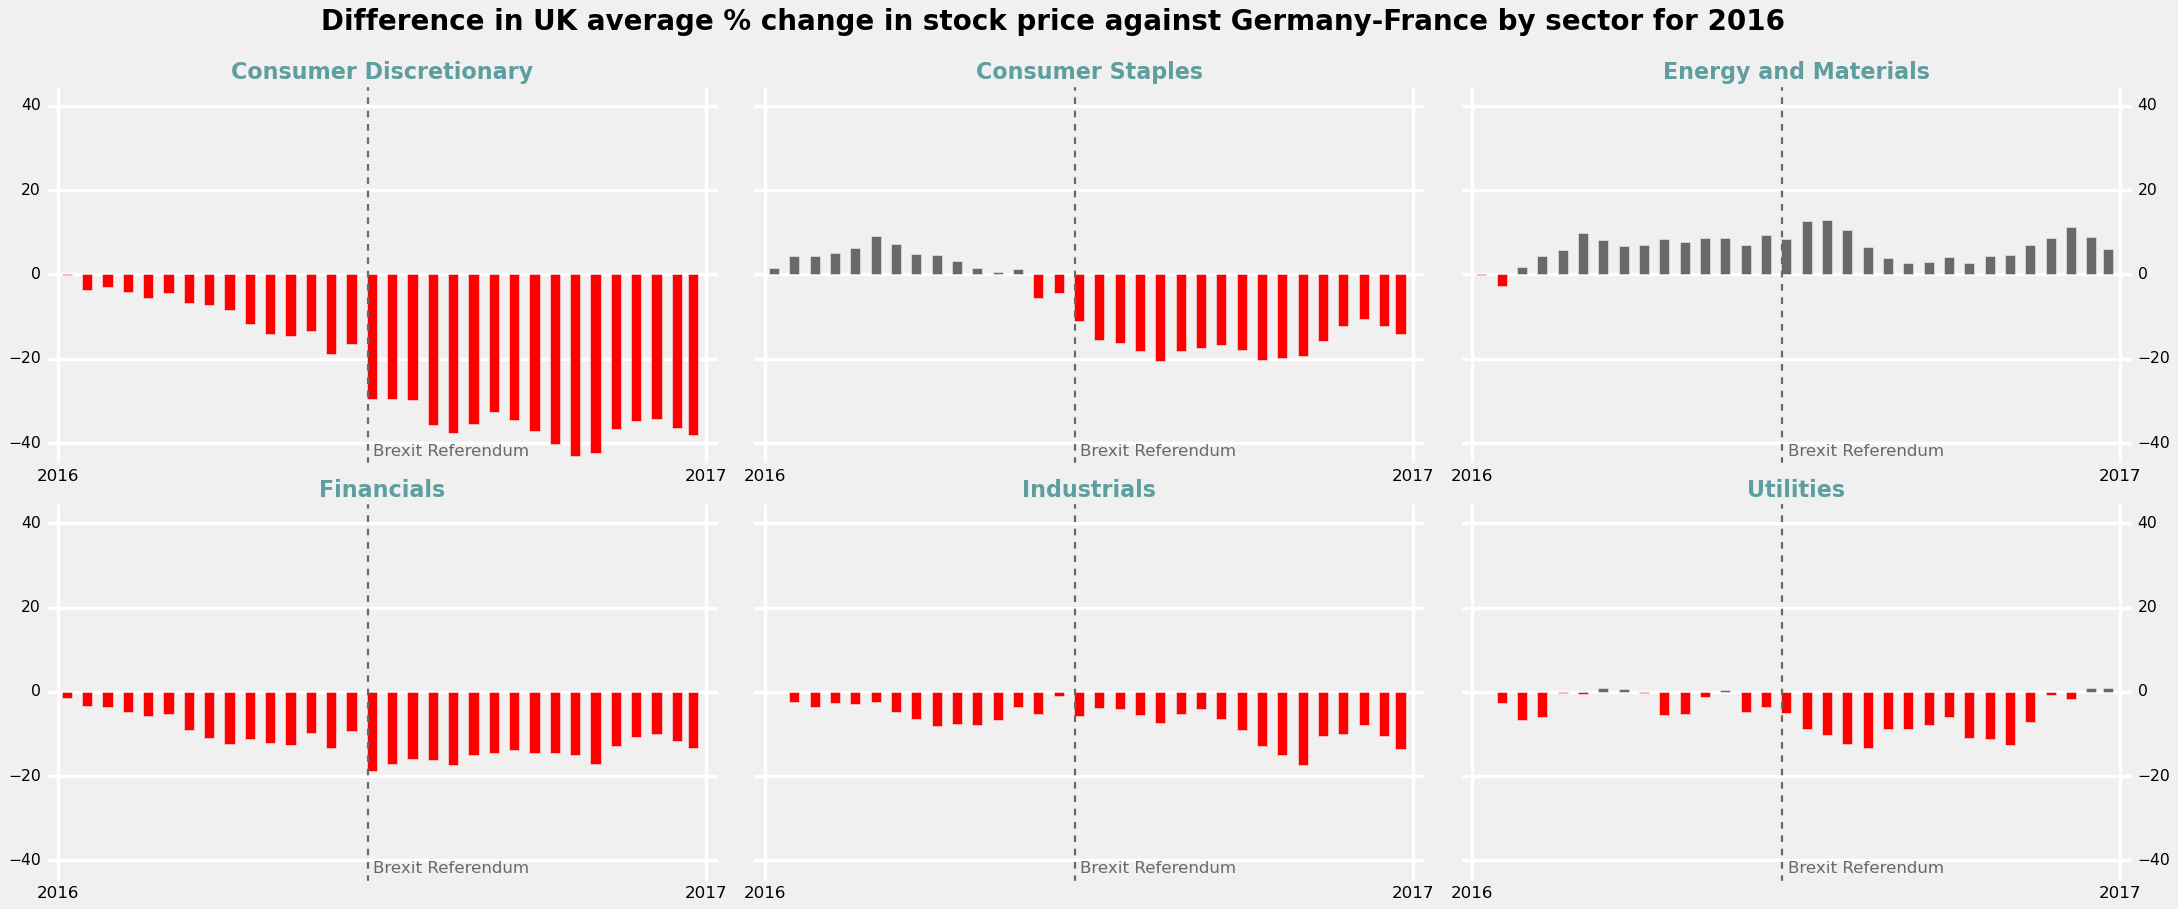

In [49]:
#style
plt.style.use("fivethirtyeight")

# figure and axes
fig = plt.figure(figsize=(30,12))
gs=gridspec.GridSpec(ncols=3, nrows=2, hspace=0.1, wspace=0.05)

ax0 = fig.add_subplot(gs[0, 0]) 
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0]) 
ax4 = fig.add_subplot(gs[1, 1]) 
ax5 = fig.add_subplot(gs[1, 2])

# get index
colormat0=np.where(diff_all_sector['consumer discretionary'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean()>0, 'dimgrey','r')
colormat1=np.where(diff_all_sector['consumer staples'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean()>0, 'dimgrey','r')
colormat2=np.where(diff_all_sector['energy and materials'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean()>0, 'dimgrey','r')
colormat3=np.where(diff_all_sector['financials'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean()>0, 'dimgrey','r')
colormat4=np.where(diff_all_sector['industrials'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean()>0, 'dimgrey','r')
colormat5=np.where(diff_all_sector['utilities'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean()>0, 'dimgrey','r')

widths=4

# shrink the length of xaxis because we have daily observations
ax0.bar(diff_all_sector['New_ID'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean(), diff_all_sector['consumer discretionary'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean(),
       width=widths,
       color=colormat0)
ax1.bar(diff_all_sector['New_ID'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean(), diff_all_sector['consumer staples'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean(),
       width=widths,
       color=colormat1)
ax2.bar(diff_all_sector['New_ID'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean(), diff_all_sector['energy and materials'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean(),
       width=widths,
       color=colormat2)
ax3.bar(diff_all_sector['New_ID'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean(), diff_all_sector['financials'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean(),
       width=widths,
       color=colormat3)
ax4.bar(diff_all_sector['New_ID'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean(), diff_all_sector['industrials'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean(),
       width=widths,
       color=colormat4)
ax5.bar(diff_all_sector['New_ID'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean(), diff_all_sector['utilities'].groupby(np.arange(len(diff_all_sector['New_ID']))//8).mean(),
       width=widths,
       color=colormat5)

# set axes limits
ax0.set_ylim(-45, 45)
ax0.set_xlim(-5, 260)
ax1.set_ylim(-45, 45)
ax1.set_xlim(-5, 260)
ax2.set_ylim(-45, 45)
ax2.set_xlim(-5, 260)
ax3.set_ylim(-45, 45)
ax3.set_xlim(-5, 260)
ax4.set_ylim(-45, 45)
ax4.set_xlim(-5, 260)
ax5.set_ylim(-45, 45)
ax5.set_xlim(-5, 260)

# set axes sticks
ax0.set_xticks(np.arange(0, 260, step=255))
ax0.set_xticklabels(['2016','2017'], weight="normal", fontsize=15)
ax1.set_xticks(np.arange(0, 260, step=255))
ax1.set_xticklabels(['2016','2017'], weight="normal", fontsize=15)
ax2.set_xticks(np.arange(0, 260, step=255))
ax2.set_xticklabels(['2016','2017'], weight="normal", fontsize=15)
ax3.set_xticks(np.arange(0, 260, step=255))
ax3.set_xticklabels(['2016','2017'], weight="normal", fontsize=15)
ax4.set_xticks(np.arange(0, 260, step=255))
ax4.set_xticklabels(['2016','2017'], weight="normal", fontsize=15)
ax5.set_xticks(np.arange(0, 260, step=255))
ax5.set_xticklabels(['2016','2017'], weight="normal", fontsize=15)

ax1.yaxis.set_ticklabels([])
ax1.yaxis.set_ticks_position('none')
ax4.yaxis.set_ticklabels([])
ax4.yaxis.set_ticks_position('none')

ax2.yaxis.tick_right()
ax5.yaxis.tick_right()

# grid
ax0.grid(color='w', linewidth=3)
ax1.grid(color='w', linewidth=3)
ax2.grid(color='w', linewidth=3)
ax3.grid(color='w', linewidth=3)
ax4.grid(color='w', linewidth=3)
ax5.grid(color='w', linewidth=3)

# title
ax0.set_title('Consumer Discretionary', fontsize=20, color="cadetblue", weight="bold")
ax1.set_title('Consumer Staples', fontsize=20, color="cadetblue", weight="bold")
ax2.set_title('Energy and Materials', fontsize=20, color="cadetblue", weight="bold")
ax3.set_title('Financials', fontsize=20, color="cadetblue", weight="bold")
ax4.set_title('Industrials', fontsize=20, color="cadetblue", weight="bold")
ax5.set_title('Utilities', fontsize=20, color="cadetblue", weight="bold")

# vertical lines and annotation
ax0.plot([122,122],[-45,45], "k--", color="dimgrey", linewidth=2)
ax1.plot([122,122],[-45,45], "k--", color="dimgrey", linewidth=2)
ax2.plot([122,122],[-45,45], "k--", color="dimgrey", linewidth=2)
ax3.plot([122,122],[-45,45], "k--", color="dimgrey", linewidth=2)
ax4.plot([122,122],[-45,45], "k--", color="dimgrey", linewidth=2)
ax5.plot([122,122],[-45,45], "k--", color="dimgrey", linewidth=2)

ax0.annotate('Brexit Referendum' ,(124,-43), fontsize=15, color="dimgrey")
ax1.annotate('Brexit Referendum' ,(124,-43), fontsize=15, color="dimgrey")
ax2.annotate('Brexit Referendum' ,(124,-43), fontsize=15, color="dimgrey")
ax3.annotate('Brexit Referendum' ,(124,-43), fontsize=15, color="dimgrey")
ax4.annotate('Brexit Referendum' ,(124,-43), fontsize=15, color="dimgrey")
ax5.annotate('Brexit Referendum' ,(124,-43), fontsize=15, color="dimgrey")

# figure title
fig.suptitle('Difference in UK average % change in stock price against Germany-France by sector for 2016', fontsize=25, weight="bold")

# save image
plt.savefig('Difference in UK average % change in stock price against Germany-France by sector for 2016.pdf')  
plt.savefig('Difference in UK average % change in stock price against Germany-France by sector for 2016')

# 5 Slope Chart that Compares the Operating Ratio between Countries in Different Sectors

## 5.1 Color is important

In [50]:
# assign colors for each country
color_c = {'united kingdom':'r','france':'teal','germany':'mediumturquoise'}

# example
color_c.get('united kingdom')

'r'

## 5.2 Split the data

In [51]:
# add month
long_term.loc[:,'month']=pd.DatetimeIndex(long_term['date']).month

# only need yearly data
long_term_2 = long_term.loc[long_term['month']==1]
long_term_2.reset_index(drop=True, inplace=True)

# the average operating ratio of countries in each sector at the same time
operating_mean = long_term_2.groupby(['country','sector','date'])['operating'].agg(np.mean)

# turn the series into a data frame
operating_mean = operating_mean.to_frame()
operating_mean.reset_index(inplace=True)

# add 'year' column
operating_mean.loc[:,'year'] = pd.DatetimeIndex(operating_mean.loc[:,'date']).year

# a list of sectors
sectors = np.unique(operating_mean['sector'])

## 5.3 Draw the graph

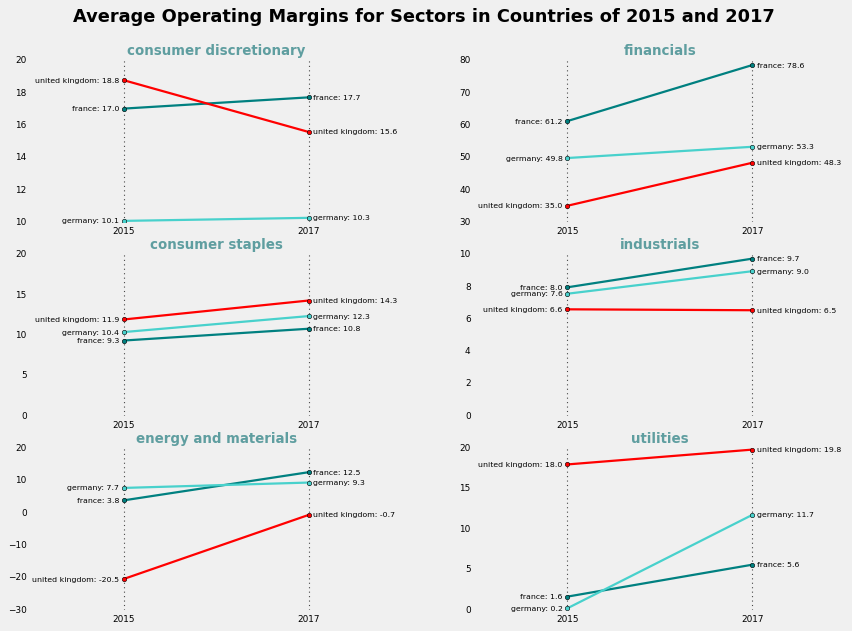

In [52]:
# set style
plt.style.use("fivethirtyeight")

# custom function that defines a new line
def newline(_p_1, _p_2, sector, color='black'):
    _l = mlines.Line2D([_p_1[0], _p_2[0]], [_p_1[1], _p_2[1]],
                       color=color, label = sector,
                       marker='o', markersize=4, linewidth=2)
    return _l

# set the years that we want to compare
# we want to compare performance before and after the year 2016 when the Brexit Referendum happened
year_0 = 2015
year_1 = 2017

# select data for years
om_00 = operating_mean.loc[operating_mean['year'] == year_0]
om_01 = operating_mean.loc[operating_mean['year'] == year_1]
om_00.reset_index(drop=True, inplace=True)
om_01.reset_index(drop=True, inplace=True)

# create figure
fig, ax = plt.subplots(3, 2, figsize=(11.69,8.27))

# use for loop to draw 6 charts in one figure for each sector respectively
for i in np.arange(6):
    
# m, n are the index for axes
    m = int(i/3)
    n = i-m*3
    
# set data for sectors
    om_0 = om_00.loc[np.where(om_00['sector']==sectors[i])[0]]
    om_1 = om_01.loc[np.where(om_01['sector']==sectors[i])[0]]


# draw the lines and add annotations
    for p1, p2, c in zip(om_0['operating'], om_1['operating'], om_0['country']):
        ax[n][m].add_line(newline([1, p1], [3, p2], sector = sectors[i], color=color_c.get(c)))
        ax[n][m].text(1 - 0.05, p1, f'{c}: {round(p1,1)}',
                horizontalalignment='right',
                verticalalignment='center',
                fontdict={'size': 7})
        ax[n][m].text(3 + 0.05, p2, f'{c}: {round(p2,1)}',
                horizontalalignment='left',
                verticalalignment='center',
                fontdict={'size': 7})

# titles for axes, axis limit and ticks
    ax[n][m].set_title(sectors[i],color="cadetblue", weight="bold",fontsize = 12)
    ax[n][m].set(xlim=(0, 4))
    ax[n][m].set_xticks([1, 3])
    ax[n][m].set_xticklabels([year_0, year_1])
    ax[n][m].tick_params(labelsize=8)

# lighten borders
    ax[n][m].spines["top"].set_alpha(.0)
    ax[n][m].spines["bottom"].set_alpha(.0)
    ax[n][m].spines["right"].set_alpha(.0)
    ax[n][m].spines["left"].set_alpha(.0)
    ax[n][m].grid(False)

# add lower and upper bound lines
    opnums = np.concatenate((np.array(om_0['operating']),(np.array(om_1['operating']))))
    ymin = np.floor(min(opnums)/10)*10
    ymax = np.ceil(max(opnums)/10)*10
    ax[n][m].vlines(x=1, ymin=ymin, ymax=ymax,
              color='black', alpha=0.7,
              linewidth=1, linestyles='dotted')
    ax[n][m].vlines(x=3, ymin=ymin, ymax=ymax,
              color='black', alpha=0.7,
              linewidth=1, linestyles='dotted')

# fig title
fig.suptitle(f'Average Operating Margins for Sectors in Countries of {year_0} and {year_1}',fontsize = 16, weight="bold")

# save figure
plt.savefig(os.path.join(os.getcwd(), 'slope_chart.pdf'))

# show plot
plt.show()

# 6 Regressions

## 6.1 Create the variables

In [53]:
### 6.1.1 "post_brexit"

# set the variable as 1 when it's later than 2016-6-1, otherwise as 0
post_brexit_index = long_term.loc[long_term['date'] > pd.to_datetime('2016-6-1').tz_localize('UTC')].index
long_term.loc[:,'post_brexit'] = 0
long_term.loc[post_brexit_index,'post_brexit'] = 1

### 6.1.2 "treated"

# set the variable as 1 when country is the UK, otherwise as 0
treated_index = long_term.loc[long_term['country']=='united kingdom'].index
long_term.loc[:,'treated'] = 0
long_term.loc[treated_index,'treated'] = 1

### 6.1.3 Separate data
'''
this is important because it enable us to run regressions for each sector respectively
'''

# get the bool objects for dividing data later
consumer_discretionary = long_term['sector'] =='consumer discretionary'
consumer_staples = long_term['sector'] == 'consumer staples'
energy_and_materials = long_term['sector'] == 'energy and materials'
financials = long_term['sector'] == 'financials'
industrials = long_term['sector'] == 'industrials'
utilities = long_term['sector'] == 'utilities'
post = long_term['date'] > pd.to_datetime('2017-1-1').tz_localize('UTC')


# screen data according to needs, here I only need data at January because we want yearly data
# by separating the sectors, we are not using sector dummy variables
long_term_1 = long_term.loc[(long_term['month']==1),:]
long_term_1.reset_index(drop=True, inplace=True)

### 6.1.4 Annual returns

# get the annual returns
length = len(long_term_1.loc[:,'price'])
long_term_1.loc[1:,'annual']=np.array(long_term_1.loc[1:length-1,'price'])/np.array(long_term_1.loc[0:length-2,'price'])-1
long_term_1.drop(long_term_1.loc[long_term_1['date']==pd.to_datetime('2014-1-1').tz_localize('UTC')].index, inplace = True)

### 6.1.5 Sector dummy variables (skip this if we separate the data by a sector)

# set dummy variables for different sectors, if we separate the sectors before, comment this line
# long_term_1 = pd.get_dummies(long_term_1, columns=['sector'])


## 6.2 Run the regression (run multiple times to get all we want)

# see the correlation
'''We decide to drop 'age', First because it's not a good indicator.
Second, correlation of assets and age is relatively high given the datasets.
Third, it indicates the time which may affect the variable post_brexit
'''
long_term_1[['assets','operating','age','debt_to_assets']].corr()

# Change the column names to avoid space
long_term_1.columns = [b.replace(' ', '_') for b in long_term_1.columns]

# generate the model without sector dummies
reg = smf.ols(formula = "annual ~ assets+ operating + debt_to_assets + post_brexit*treated +  C(list(long_term_1.loc[:,'company_name']))", data = long_term_1).fit()

# with sector dummies
# reg = smf.ols(formula = "annual ~ assets+ operating + debt_to_assets + post_brexit*treated + sector_consumer_discretionary + sector_consumer_staples + sector_energy_and_materials + sector_financials + sector_industrials +  C(list(long_term_1.loc[:,'company_name']))", data = long_term_1).fit()

# show the results
reg.summary()

C:\Users\ibulf\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ibulf\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\ibulf\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 annual   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.9484
Date:                Wed, 11 Nov 2020   Prob (F-statistic):              0.662
Time:                        15:15:56   Log-Likelihood:                -107.31
No. Observations:                 724   AIC:                             586.6
Df Residuals:                     538   BIC:                             1439.
Df Model:                         185                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================================
                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                               0.4611      0.269      1.711      0.088      -0.068       0.990
C(list(long_term_1.loc[:, 'company_name']))[T.acacia mining]                           -0.0561      0.184     -0.306      0.760      -0.417       0.305
C(list(long_term_1.loc[:, 'company_name']))[T.accorhotels]                             -0.2849      0.259     -1.098      0.273      -0.794       0.225
C(list(long_term_1.loc[:, 'company_name']))[T.adidas]                                  -0.2031      0.290     -0.700      0.484      -0.773       0.367
C(list(long_term_1.loc[:, 'company_name']))[T.adp aerports de paris]                   -0.0577      0.241     -0.240      0.811      -0.531       0.415
C(list(long_term_1.loc[:, 'company_name']))[T.aggreko]                                 -0.1734      0.169     -1.023      0.307      -0.506       0.159
C(list(long_term_1.loc[:, 'company_name']))[T.air france]                               0.0408      0.247      0.165      0.869      -0.445       0.526
C(list(long_term_1.loc[:, 'company_name']))[T.air liquide]                             -0.2036      0.250     -0.815      0.416      -0.695       0.287
C(list(long_term_1.loc[:, 'company_name']))[T.alba se]                                 -0.4452      0.307     -1.452      0.147      -1.048       0.157
C(list(long_term_1.loc[:, 'company_name']))[T.allianz]                                 -0.0484      0.539     -0.090      0.928      -1.107       1.011
C(list(long_term_1.loc[:, 'company_name']))[T.anglo american]                           0.7443      0.164      4.544      0.000       0.423       1.066
C(list(long_term_1.loc[:, 'company_name']))[T.ashtead group]                            0.3696      0.180      2.055      0.040       0.016       0.723
C(list(long_term_1.loc[:, 'company_name']))[T.aurubis]                                 -0.2541      0.291     -0.873      0.383      -0.826       0.318
C(list(long_term_1.loc[:, 'company_name']))[T.aviva]                                    0.0260      0.282      0.092      0.927      -0.528       0.580
C(list(long_term_1.loc[:, 'company_name']))[T.axa group]                               -0.1061      0.546     -0.194      0.846      -1.180       0.967
C(list(long_term_1.loc[:, 'company_name']))[T.bae systems]                             -0.0107      0.167     -0.064      0.949      -0.339       0.317
C(list(long_term_1.loc[:, 'company_name']))[T.balfour beatty]                          -0.1046      0.171     -0.613      0.540      -0.440       0.230
C(list(long_term_1.loc[:, 'company_name']))